      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


Text(0, 0.5, 'Psi [degree]')

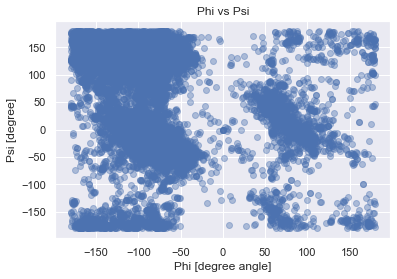

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

#Always check the path to the CSV file
df = pd.read_csv("data_all.csv")
print(df)


#Plotting

plt.scatter(df.loc[:,"phi"], df.loc[:,"psi"], alpha = 0.4)
plt.title("Phi vs Psi")
plt.xlabel("Phi [degree angle]")
plt.ylabel("Psi [degree]")

In [78]:
# Perform K-Means clustering    
# Specify the number of clusters (3) and fit the data Phi
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[["phi","psi"]])
y_kmeans = kmeans.predict(df[["phi","psi"]])

In [79]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[-105.18210709  134.59750562]
 [ -78.08276981  -36.94442146]
 [  87.55008471    8.80213455]]


In [80]:
# Get the cluster labels
print(kmeans.labels_)

[0 0 1 ... 0 1 0]


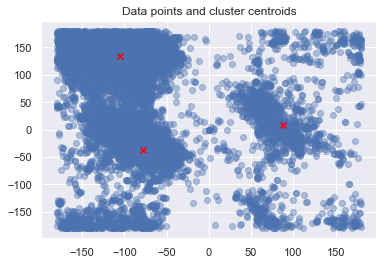

In [72]:
# Plotting the cluster centers and the data points on a 2D plane

plt.scatter(df.loc[:,"phi"], df.loc[:,"psi"], alpha = 0.4)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

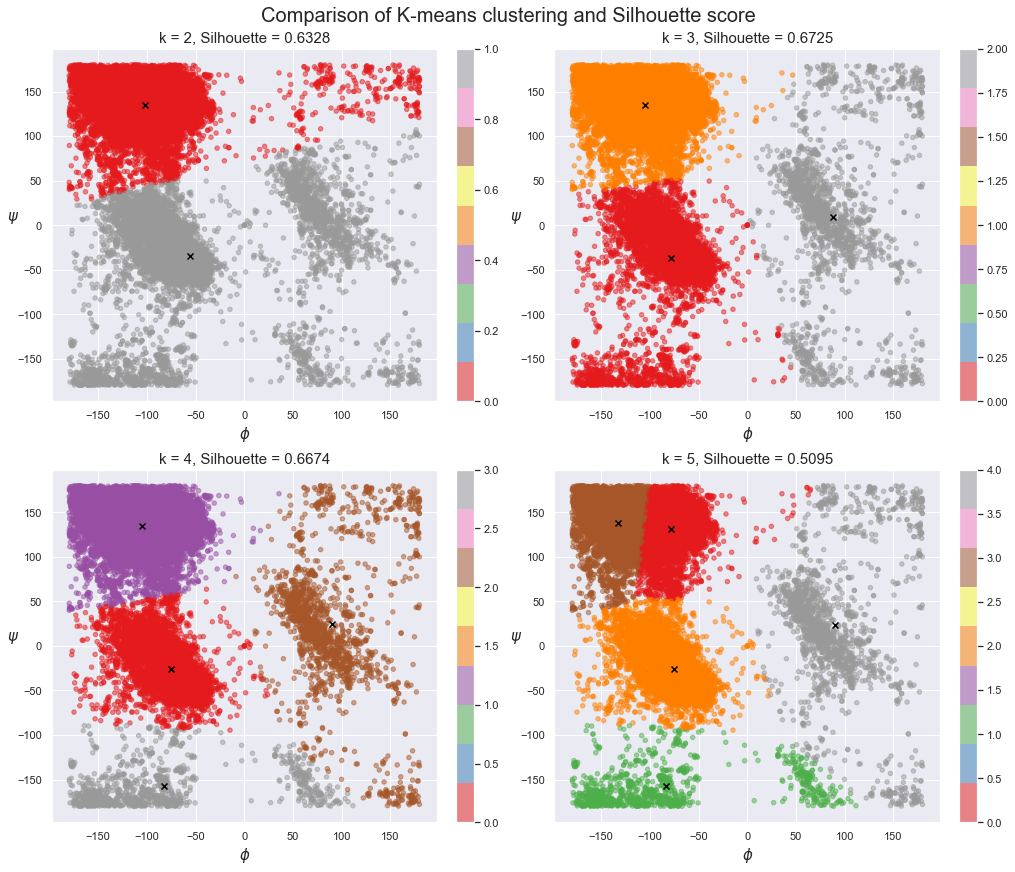

In [73]:
from sklearn.metrics import silhouette_score

# Set k values to test
ks = [2,3,4,5]

# Setup plt subfigures to hold each scatterplot
fig,axs = plt.subplots(int(len(ks)/2),2, figsize=(2*7, int(len(ks)/2)*6),
                       constrained_layout=True)
axs = axs.flatten()

# Run KMeans for each k in ks, then plot the result
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k).fit(df[["phi", "psi"]])
    clusters = kmeans.cluster_centers_
        
    df.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], 
                      c=kmeans.labels_, cmap="Set1")
    axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black", marker='x')
    
    axs[i].set_title(f"k = {k}, Silhouette = "
                     f"{silhouette_score(df[['phi', 'psi']], kmeans.labels_):,.4f}"
                    ,size=15)
    axs[i].set_ylabel(r"$\psi$", rotation="horizontal",size=15)
    axs[i].set_xlabel(r"$\phi$",size=15)

# Configure plot
fig.suptitle("Comparison of K-means clustering and Silhouette score", size=20)
plt.show()

In [81]:
#Running K-Means with a range of k to apply the elbow method for determining the best value for k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[["phi"]])
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

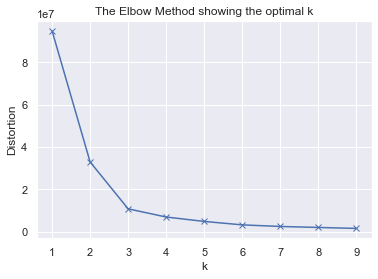

In [82]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

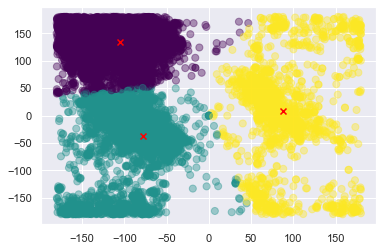

In [83]:
#Plotting the data, clustered, with a differentialtion between the 3 clusters 
plt.scatter(df.loc[:,"phi"], df.loc[:,"psi"], c=y_kmeans, s=50, cmap='viridis', alpha = 0.4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], c='red', marker='x')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


                0           1         phi         psi
0      210.687145  142.657714  210.687145  242.657714
1      315.716790  136.002076  315.716790  236.002076
2      240.027379  191.294737  240.027379  -68.705263
3      224.682788  137.143523  224.682788  237.143523
4      255.148533   95.928520  255.148533  195.928520
...           ...         ...         ...         ...
29364  212.250443  155.223562  212.250443  255.223562
29365  242.571459  133.019506  242.571459  233.019506
29366  246.413552  112.091970  246.413552  212.091970
29367  259.331221  347.897179  259.331221   87.897179
29368  190.048760   94.233680  190.048760  194.233680

[29369 rows x 4 columns]
                0           1         phi         psi
0      210.687145  142.657714  210.687145  142.657714
1      315.716790  136.002076  315.716790  136.002076
2      240.027379  191.294737  240.027379  191.294737
3      224.682788  137.143523  224.682788  137.143523
4      255.148533   95.928520  255.148533   95.928520
..

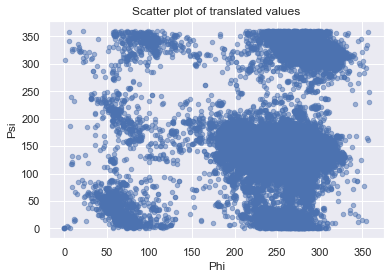

In [67]:
# Question 2d
# Shift values of phi by 100 and values of psi by 360 explained in pdf
df_translated[['phi']] =pd.DataFrame((df[['phi']].values) + 360)
df_translated[['psi']] =pd.DataFrame((df[['psi']].values) + 100)
print(df_translated)
# Make it an angle between 0-360 degree by modulue 
df_translated[['phi', 'psi']] =pd.DataFrame((df[['phi', 'psi']].values) % 360)


df_translated.plot.scatter(x="phi", y="psi", alpha = 0.5)
plt.title("Scatter plot of translated values")
plt.xlabel('Phi')
plt.ylabel('Psi')
print(df_translated)

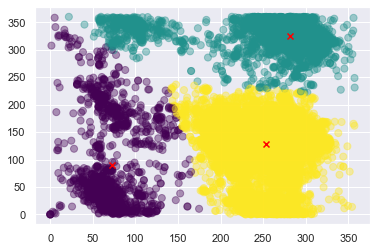

In [85]:
# Perform K-Means clustering    
# Specify the number of clusters (3) and fit the data Phi
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_translated[["phi","psi"]])
y_kmeans = kmeans.predict(df_translated[["phi","psi"]])

#Plotting the data, clustered, with a differentialtion between the 3 clusters 
plt.scatter(df_translated.loc[:,"phi"], df_translated.loc[:,"psi"], c=y_kmeans, s=50, cmap='viridis', alpha = 0.4)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], c='red', marker='x')

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

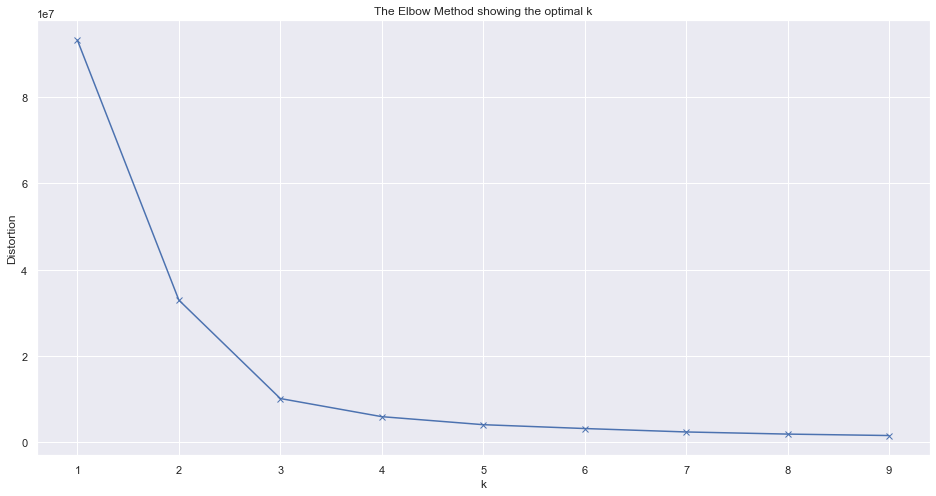

In [39]:
#Running K-Means with a range of k to apply the elbow method for determining the best value for k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_translated[["phi"]])
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

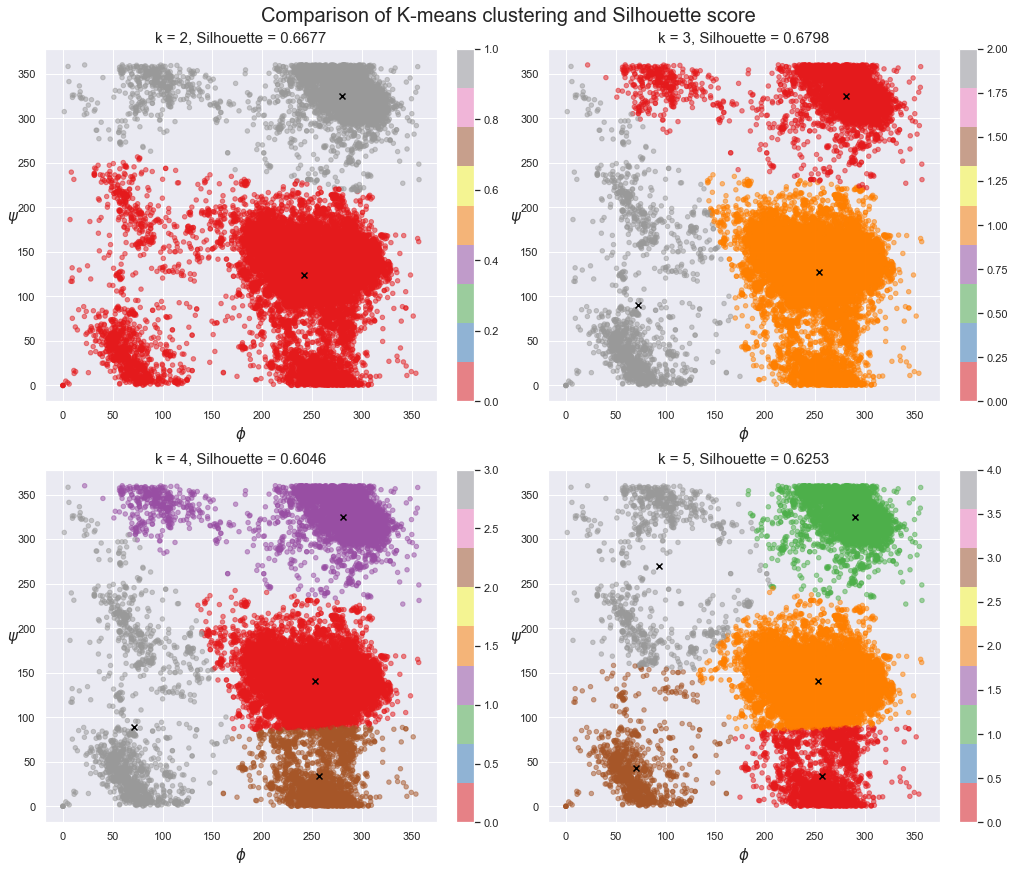

In [86]:

# Set k values to test
ks = [2,3,4,5]

# Setup plt subfigures to hold each scatterplot
fig,axs = plt.subplots(int(len(ks)/2),2, figsize=(2*7, int(len(ks)/2)*6),
                       constrained_layout=True)
axs = axs.flatten()

# Run KMeans for each k in ks, then plot the result
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k).fit(df_translated[["phi", "psi"]])
    clusters = kmeans.cluster_centers_
        
    df_translated.plot.scatter(x="phi", y="psi", alpha = 0.5, ax=axs[i], 
                      c=kmeans.labels_, cmap="Set1")
    axs[i].scatter(x=clusters[:,0], y=clusters[:,1], c="Black", marker='x')
    
    axs[i].set_title(f"k = {k}, Silhouette = "
                     f"{silhouette_score(df_translated[['phi', 'psi']], kmeans.labels_):,.4f}"
                    ,size=15)
    axs[i].set_ylabel(r"$\psi$", rotation="horizontal",size=15)
    axs[i].set_xlabel(r"$\phi$",size=15)

# Configure plot
fig.suptitle("Comparison of K-means clustering and Silhouette score", size=20)
plt.show()